# TASK 2: Prediction Using Unsupervised ML

## Step 1: Reading and Understanding the Data

1. Importing data using the pandas library
2. Understanding the structure of the data

In [1]:
#importing libraries
import pandas as pd
import numpy as np

import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from sklearn import datasets

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
#loading data 
df= pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# shape of df
df.shape

(150, 6)

In [4]:
#Info about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# About the df
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Step 2: Visualising the Data

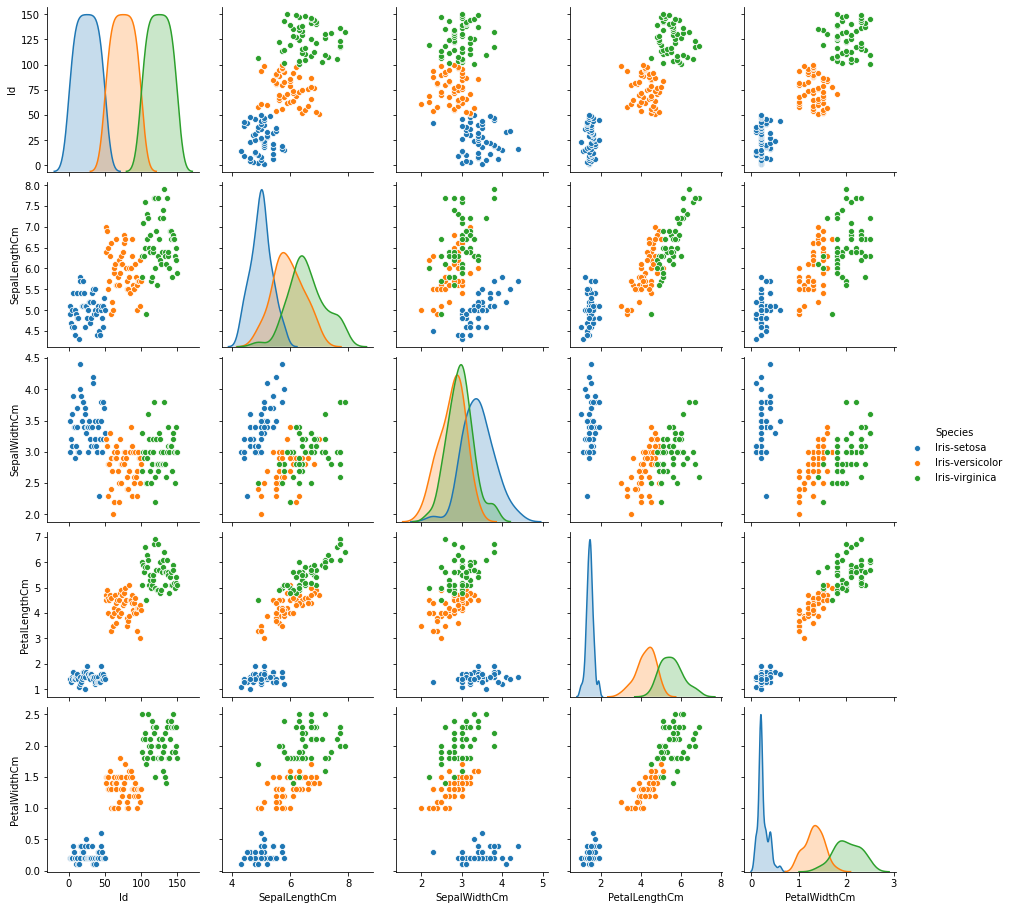

In [6]:
sns.pairplot(df,diag_kind='kde',hue='Species')    
plt.show()

In [7]:
#corelation matrix
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


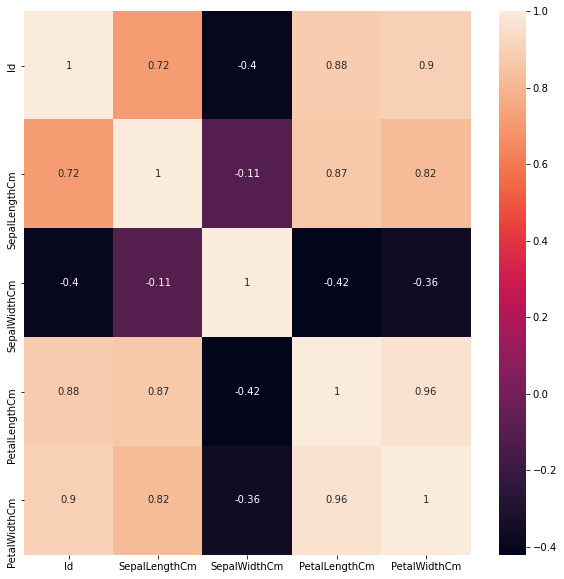

In [8]:
#heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

### Checking Hopkins score

In [9]:

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [10]:
hopkins(df.drop('Species',axis=1))

0.6651595289529973

We have a good hopkins score.. hence we can proceed with the clustering

### KMEANS Clustering

Finding value of k using silhouette score/ elbow curve

In [11]:
df1=df.drop('Species',axis=1)

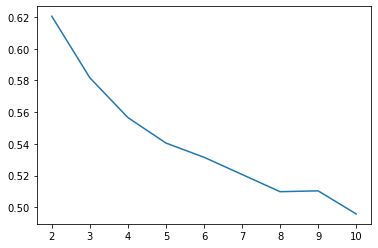

In [12]:
#silhouette score

ss = []
for k in range(2,11):
    kmeans=KMeans(n_clusters=k).fit(df1)
    ss.append([k,silhouette_score(df1,kmeans.labels_)])

              
plt.plot(pd.DataFrame(ss)[0],pd.DataFrame(ss)[1])

In [13]:
# Taking K as 3
kmean=KMeans(n_clusters=3, random_state=100).fit(df1)

In [14]:
#converting into a dataframe
label=pd.DataFrame(kmean.labels_,columns=['label'])

In [15]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [16]:
df.kmean=df1.copy()

In [17]:
df.kmean=pd.concat([df.kmean,label],axis=1)

In [18]:
df.kmean.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,2
1,2,4.9,3.0,1.4,0.2,2
2,3,4.7,3.2,1.3,0.2,2
3,4,4.6,3.1,1.5,0.2,2
4,5,5.0,3.6,1.4,0.2,2


In [19]:
#count for each cluster
df.kmean.label.value_counts()

1    51
0    50
2    49
Name: label, dtype: int64

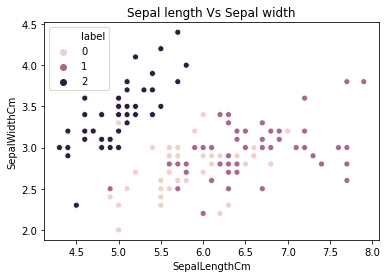

In [20]:
#Plotting Scatter plot 
plt.title('Sepal length Vs Sepal width')
sns.scatterplot(x='SepalLengthCm',y='SepalWidthCm', data=df.kmean,hue='label')
plt.show()


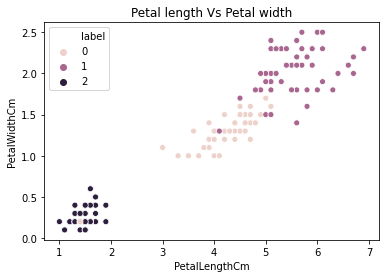

In [21]:
#Plotting Scatter plot 
plt.title('Petal length Vs Petal width')
sns.scatterplot(x='PetalLengthCm',y='PetalWidthCm', data=df.kmean,hue='label')
plt.show()


### Hierarchial Clustering

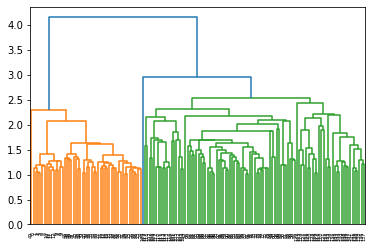

In [22]:
#single linkage

hierar = linkage(df.kmean,method='single',metric='euclidean')
dendrogram(hierar)
plt.show()

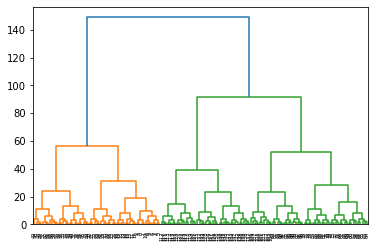

In [23]:
#complete linkage

hierar = linkage(df.kmean,method='complete',metric='euclidean')
dendrogram(hierar)
plt.show()

In [24]:
#3 clusters
cut_tree(hierar,n_clusters=3).shape

(150, 1)

In [25]:
hierlabels=cut_tree(hierar,n_clusters=3).reshape(-1,)

In [26]:
df.kmean['hierlabels']=hierlabels
df.kmean.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label,hierlabels
0,1,5.1,3.5,1.4,0.2,2,0
1,2,4.9,3.0,1.4,0.2,2,0
2,3,4.7,3.2,1.3,0.2,2,0
3,4,4.6,3.1,1.5,0.2,2,0
4,5,5.0,3.6,1.4,0.2,2,0


In [27]:
df.kmean['hierlabels'].value_counts()

0    57
1    53
2    40
Name: hierlabels, dtype: int64